# Visualizing Initial Conditions and LPT Density Field

This notebook demonstrates how to load and visualize the initial conditions and the density field generated using Lagrangian Perturbation Theory (LPT) from the saved numpy files. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Running the code

After following the instructions in the README file to install `jaxDecomp` you can run the script with the following command:


```sh
mpirun -n 4 python jaxdecomp_lpt.py -s 1024 -b 1024 -p 2x2 -hs 256 -o out
```

Or if you have a slurm cluster, you can use the following command:
(salloc command may vary depending on the cluster configuration. Please consult the cluster documentation for more information.)

```sh
salloc --nodes=1 --ntasks=4 --cpus-per-task=1 --gres=gpu:4 --time=00:30:00
srun python jaxdecomp_lpt.py -s 1024 -b 1024 -p 2x2 -hs 256 -o out
``



## Load the Initial Conditions and Density Field

In this cell, we specify the folder containing the saved numpy files and the distribution dimensions (`pdims`). We then load the data from each file, combine the slices, and construct the complete fields for visualization.

__Note__: The `pdims` variable should be set to the same value as the `-p` argument used in the script execution

In [10]:
folder = 'out'
pdims=(2,2)

init_field_slices = []
field_slices = []

for i in range(pdims[0]):
    row_init_field = []
    row_field = []
    
    for j in range(pdims[1]):
        slice_index = i * pdims[1]  + j 
        row_field.append(np.load(f'{folder}/field_{slice_index}.npy'))
        row_init_field.append(np.load(f'{folder}/initial_conditions_{slice_index}.npy'))

    field_slices.append(np.vstack(row_field))
    init_field_slices.append(np.vstack(row_init_field))

field = np.hstack(field_slices)
initial_conditions = np.hstack(init_field_slices)

field.shape

(1024, 1024, 1024)

## Function to Plot the Fields

We define a function `plot` that takes a projection axis as input and generates two subplots: one for the initial conditions and one for the LPT density field at `z=0`. The fields are summed over slices perpendicular to the projection axis.


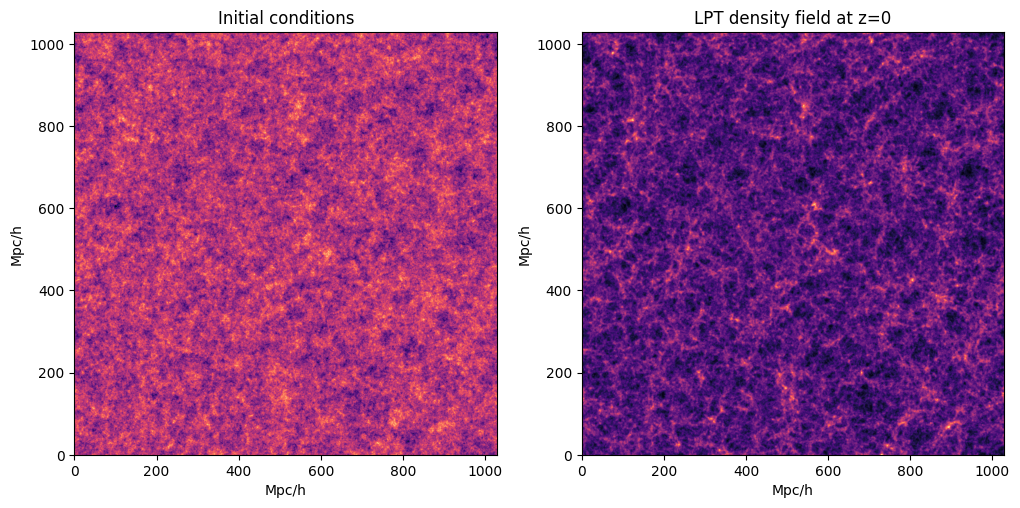

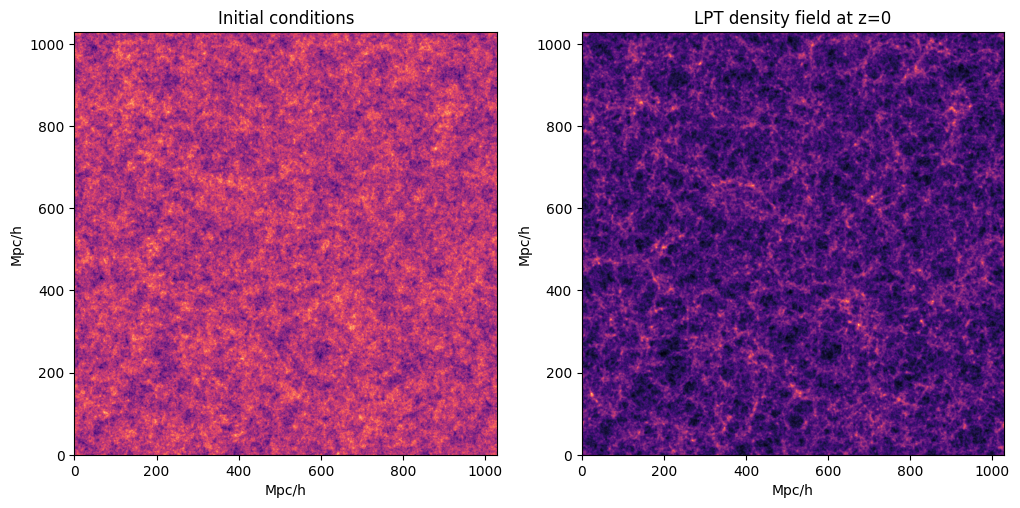

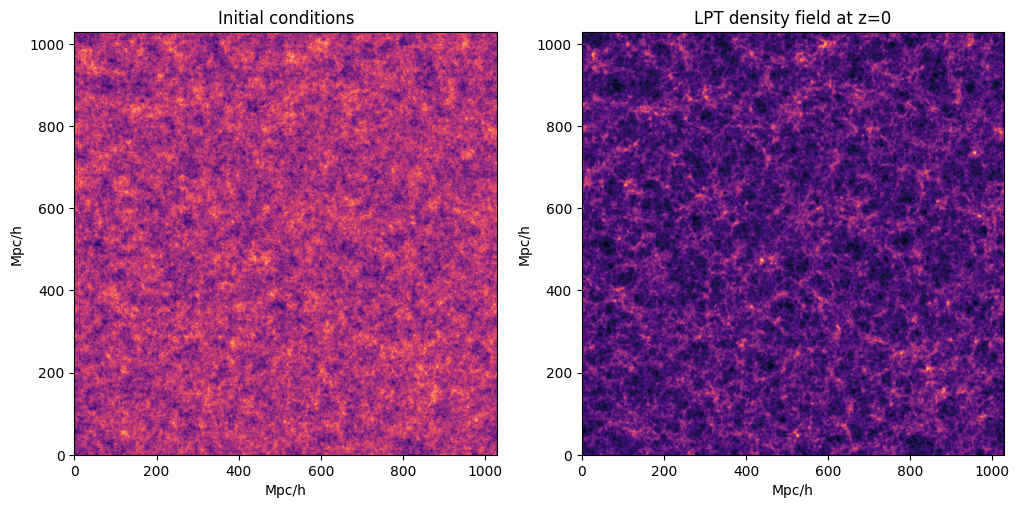

In [11]:
def plot(proj_axis):
    box_size = 1024
    sum_over = initial_conditions.shape[0] // 2

    slicing = [slice(None)] * initial_conditions.ndim
    slicing[proj_axis] = slice(None, sum_over)
    slicing = tuple(slicing)


    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Flatten axes for easy indexing
    axes = axes.flatten()

    # Plot initial conditions
    axes[0].imshow(initial_conditions[slicing].sum(axis=proj_axis), cmap='magma', extent=[0, box_size + 5, 0, box_size + 5])
    axes[0].set_xlabel('Mpc/h')
    axes[0].set_ylabel('Mpc/h')
    axes[0].set_title('Initial conditions')

    # Plot LPT density field at z=0
    axes[1].imshow(field[slicing].sum(axis=proj_axis), cmap='magma', extent=[0, box_size + 5, 0, box_size + 5])
    axes[1].set_xlabel('Mpc/h')
    axes[1].set_ylabel('Mpc/h')
    axes[1].set_title('LPT density field at z=0')

for i in range(3):
    plot(i)

## Visualize the LPT Density Field

In this cell, we get a better look at the LPT density field by summing the first 16 slices and taking the logarithm of the density field. 


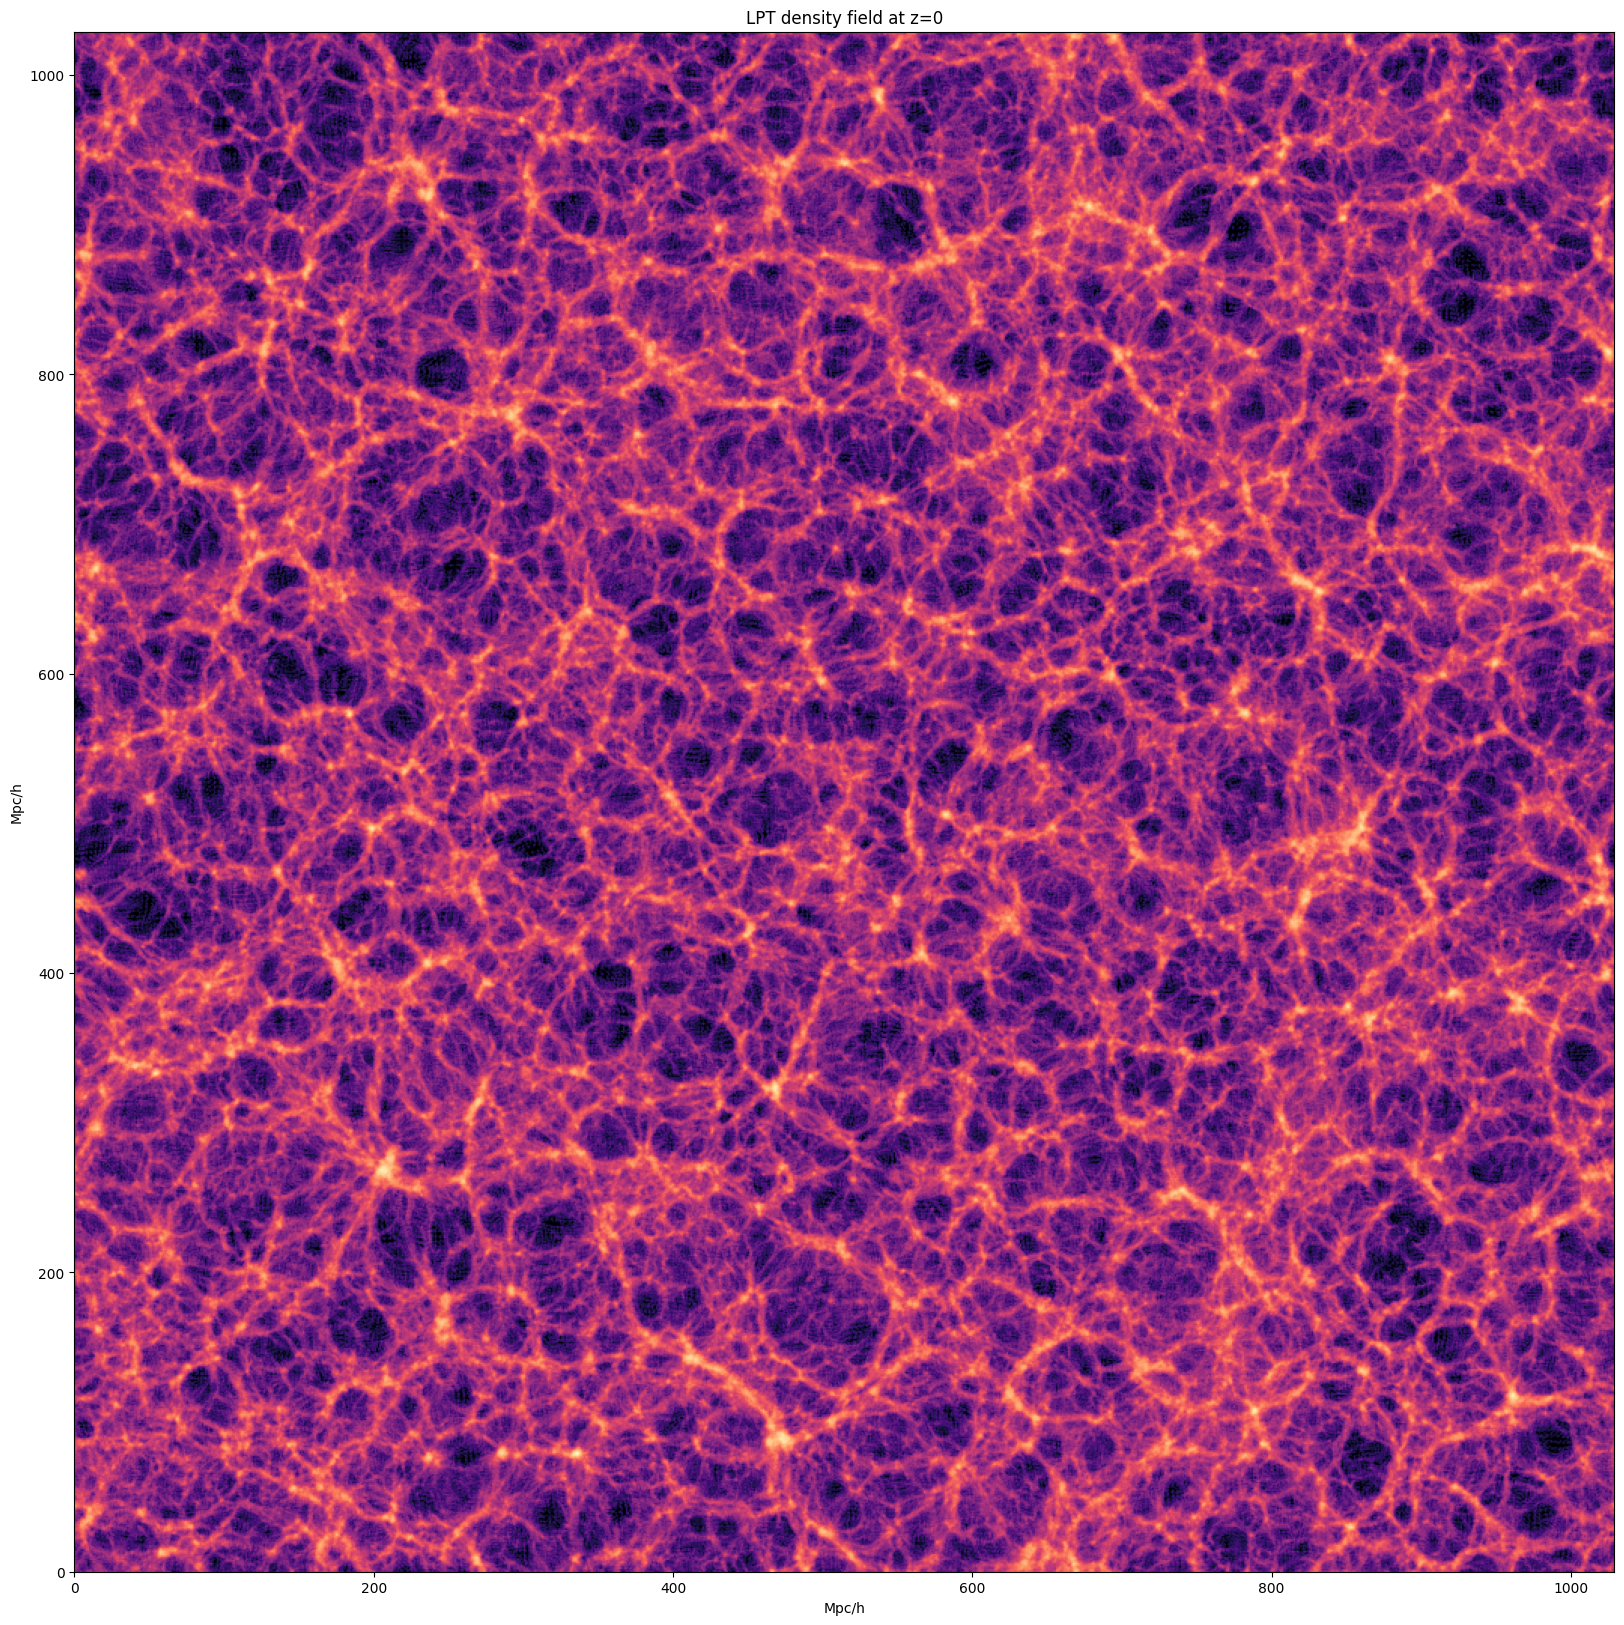

In [12]:
# Projection axis and box size
proj_axis = 0
box_size = 1024 + 5
plt.figure(figsize=(20, 20))
# Generate the plot
plt.imshow(np.log10(field[:16].sum(axis=proj_axis) + 1), cmap='magma', extent=[0, box_size, 0, box_size])
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.title('LPT density field at z=0')

# Display the plot
plt.show()